# INTELIGENCIA ARTIFICIAL (1INF24\)
Dr. Edwin Villanueva Talavera (ervillanueva@pucp.edu.pe)

# Red neuronal MLP para clasificacion de imagenes de digitos (dataset MNIST)



In [26]:
# Cargar librerias y modulos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split  # para partir los datos en conjuntos de entrenamiento y validacion
from sklearn.model_selection import KFold  # para partir la data en k-folds
from sklearn.model_selection import cross_val_score   # para evaluar algoritmos en cross validacion

from sklearn.metrics import accuracy_score, balanced_accuracy_score   # para manejar metricas de desempeño
from sklearn.metrics import classification_report  # para hacer reportes de resultados de clasificacion
from sklearn.metrics import confusion_matrix  # para manejar matrices de confusion

In [27]:
import tensorflow

In [28]:
# Carga la libreria Keras (de Tensorflow) para crear redes neuronales
from tensorflow import keras

In [29]:
# Carga capas de Keras para crear redes neuronales MLP
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten

In [30]:
# Version de tensorflow y keras
print(tensorflow.__version__)

2.17.0


### Carga dataset MNIST

In [31]:
mnist = keras.datasets.mnist
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

In [32]:
X_train.max()

255

Train: X=(60000, 28, 28), y=(60000,)
Validacion: X=(10000, 28, 28), y=(10000,)


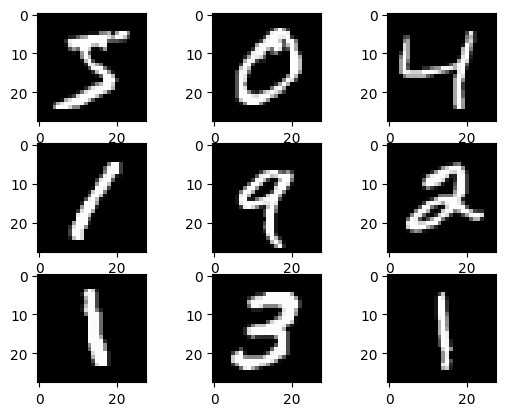

In [33]:
# muestra la cantidad de datos cargados en conjuntos de train y test
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Validacion: X=%s, y=%s' % (X_valid.shape, y_valid.shape))

# muestra las primeras 9 imagenes
for i in range(9):
    # define subplots
    plt.subplot(330 + 1 + i)
    # plotea raw pixels
    plt.imshow(X_train[i], cmap=plt.cm.gray)
plt.show()

In [34]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

### Convierte el target en un vector one-hot

In [35]:
y_train_onehot = keras.utils.to_categorical(y_train)
y_valid_onehot = keras.utils.to_categorical(y_valid)

In [36]:
print(y_train_onehot.shape)
print(y_valid_onehot.shape)

(60000, 10)
(10000, 10)


In [37]:
y_train_onehot

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [38]:
y_train_onehot[0]  # muestra el target one-hot de la primera muestra

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

### Escala los pixels al rango entre 0-1

Para facilitar el aprendizaje de redes neuronales es bueno escalar los valores de los pixels al rango de [0-1]

In [39]:
# convierte primero los pixels en numeros de punto flotante
X_train_norm = X_train.astype('float32')
X_valid_norm = X_valid.astype('float32')
# normaliza al rango 0-1
X_train_norm = X_train_norm / 255.0
X_valid_norm = X_valid_norm / 255.0

### Define modelo MLP

La figura siguiente ilustra un modelo MLP para clasificar imagenes de digitos de 28x28 pixeles.  Se compone de un modelo secuencial de dos capas ocultas con activacion RELU, y una capa de salida con activacion Sofmax (para que la salidas se interpreten como probabilidades).

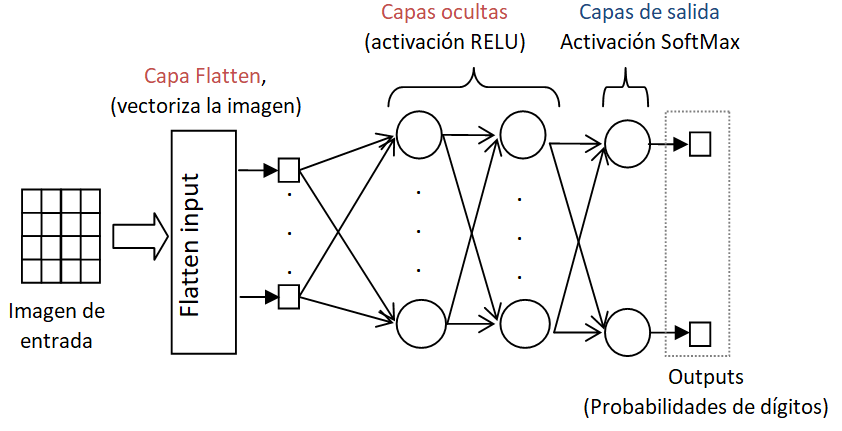

La funcion de perdida es 'categorical_crossentropy' la cual se calcula de la siguiente forma:



> Dadas las C salidas de la red (con activacion softmax)  [ypred_1, ypred_2, ..., ypred_C]  y   dado el target en one-hot [ytrue_1, ytrue_2, ..., ytrue_C], la funcion de perdida categorical_crossentropy (CE) se define como:



    
            CE = -Sum( ytrue_i * ln(ypred_i) )

In [40]:
784*300

235200

In [41]:
# Funcion para definir el modelo MLP de la figura de arriba
def define_modelo_MLP():
    modelo = Sequential()  # Sequential indica que el modelo sera una pila de capas conec tadas secuencialmente (MLP)
    modelo.add( Flatten(input_shape=[28, 28]) ) # capa Flaten convierte la imagen de 28*28 a un vector 1D de 784 elementos
    modelo.add( Dense(300, activation="relu") ) # Define 1era capa oculta con 300 neuronas y funcion de activacion RELU
    modelo.add( Dense(100, activation="relu") ) # Define 2da capa oculta con 100 neuronas y funcion de activacion RELU
    modelo.add( Dense(10, activation="softmax") ) # Define capa de salida con 10 neuronas (salidas) con activacion softmax
    # compila el modelo
    #opt = SGD(lr=0.01, momentum=0.9)
    modelo.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'] )
    return modelo

In [42]:
# Funcion para definir el modelo MLP de la figura de arriba
def define_modelo_MLP1():
    modelo = Sequential()  # Sequential indica que el modelo sera una pila de capas conec tadas secuencialmente (MLP)
    modelo.add( Flatten(input_shape=[28, 28]) ) # capa Flaten convierte la imagen de 28*28 a un vector 1D de 784 elementos
    modelo.add( Dense(100, activation="relu") ) # Define 1era capa oculta con 300 neuronas y funcion de activacion RELU
    modelo.add( Dense(70, activation="relu") ) # Define 2da capa oculta con 100 neuronas y funcion de activacion RELU
    modelo.add( Dense(40, activation="relu") ) # Define 2da capa oculta con 100 neuronas y funcion de activacion RELU
    modelo.add( Dense(10, activation="softmax") ) # Define capa de salida con 10 neuronas (salidas) con activacion softmax
    # compila el modelo
    #opt = SGD(lr=0.01, momentum=0.9)
    modelo.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'] )
    return modelo

In [51]:
modelo = define_modelo_MLP1()  # llama a funcion que define el modelo
modelo.summary()         # muestra un resumen de la topologia del modelo

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_13 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 70)                  │           7,070 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 40)                  │           2,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ (None, 10)                  │             410 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 88,820 (346.95 KB)

 Trainable params: 88,820 (346.95 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
300*784

235200

### Evalua arquitectura MLP  en crosvalidacion

La siguiente funcion realiza el trabajo de evaluar una arquitectura de modelo dado (model_builder) en estrategia k-fold cross-validation. Recibe como parametros el constructor del modelo, los ejemplos de entrenaiento (<b>X</b>) y sus etiquetas one-hot (<b>y</b>) y la cantidad de folds (<b>n_folds</b>)

In [45]:
from keras.callbacks import EarlyStopping
# evalua una arquitectura de modelo neuronal en k-fold cross-validation. Se pasa la funcion constructora del modelo
def evalua_modeloCV(model_buider, X, y, n_folds=5):
    accuracies, histories = list(), list()
    # prepara folds
    seed = 7
    kfold = KFold(n_splits=n_folds, random_state=seed, shuffle= True)

    # realiza la cross-validacion
    for train_ix, test_ix in kfold.split(X):   # por cada fold de test
        # define modelo MLP
        modelo = model_buider()
        # selecciona los sets de training y de test
        trainX, trainY, testX, testY = X[train_ix], y[train_ix], X[test_ix], y[test_ix]
        # entrena el modelo
        history = modelo.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
        # obtiene metricas de evaluacion en el fold de test del modelo entrenado
        _, acc = modelo.evaluate(testX, testY, verbose=0)
        print('> %.3f' % (acc * 100.0))

        accuracies.append(acc)   # guarda la acuracia obtenida en el fold  de test
        histories.append(history)  # guarda hitórico de evolucion de scores entrenamiento  (loss y acuracias)
    return accuracies, histories

In [46]:
# llama a la funcion anterior para realizar la evaluacion
cv_accuracies, cv_histories = evalua_modeloCV(define_modelo_MLP, X_train_norm, y_train_onehot, 5)

> 96.433
> 95.908
> 95.967
> 96.267
> 96.075


In [52]:
# llama a la funcion anterior para realizar la evaluacion
cv_accuracies, cv_histories = evalua_modeloCV(define_modelo_MLP1, X_train_norm, y_train_onehot, 5)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


> 96.383
> 95.858
> 96.042
> 96.267
> 95.992


### Plotea el desempeño del modelo y las curvas de aprendizaje

Las funcion <b>show_boxplot_accuracy()</b> muestra un boxplot de las acuracias obtenidas en crosvalidacion. La funcion <b>plot_learning_curves()</b>  muestra las curvas de aprendizaje obtenidas de cada modelo entrenado en crossvalidacion

In [47]:
# muestra un boxplot de las acuracias obtenidas en crosvalidacion
def show_boxplot_accuracy(accuracies):
    # muetra un resumen de las acuracies
    print('Accuracy: mean=%.3f std=%.3f, n=%d' % (np.mean(accuracies)*100, np.std(accuracies)*100, len(accuracies)))
    # boxplot de las accuracias
    plt.boxplot(accuracies)
    plt.show()

# plotea curvas de diagnostico de aprendizaje
def plot_learning_curves(histories):
    for i in range(len(histories)):
        # plotea la curva de loss
        plt.subplot(2, 1, 1)
        plt.title('Cross Entropy Loss')
        plt.plot(histories[i].history['loss'], color='blue', label='train')
        plt.plot(histories[i].history['val_loss'], color='orange', label='test')
        # plotea curva de accuracy
        plt.subplot(2, 1, 2)
        plt.title('Classification Accuracy')
        plt.plot(histories[i].history['accuracy'], color='blue', label='train')
        plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
    plt.show()

Accuracy: mean=96.108 std=0.190, n=5


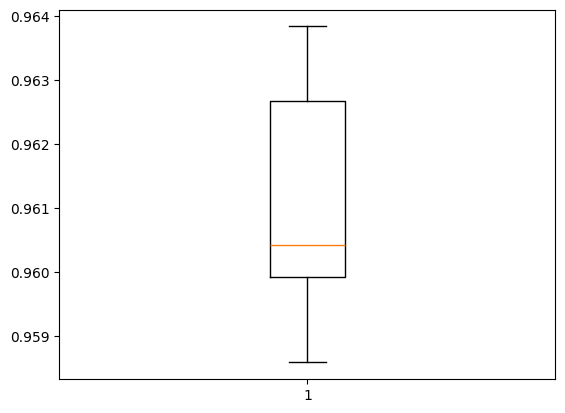

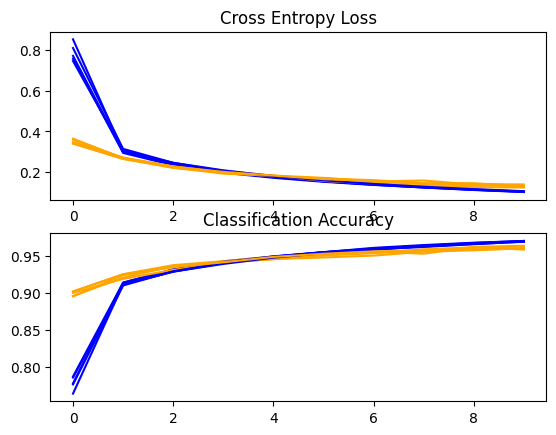

In [53]:
show_boxplot_accuracy(cv_accuracies)   # muestra boxplot de resultados de acuracias de crossvalidacion
plot_learning_curves(cv_histories)     # muestra curvas de aprendizaje de cada modelo entrenado en crossvalidacion

###  Entrena el modelo final con toda la data de train  y lo evalua en data de validacion



In [54]:
# define modelo final
modelo_finalMLP = define_modelo_MLP()

# entrena  modelo final
modelo_finalMLP.fit(X_train_norm, y_train_onehot, epochs=10, batch_size=32, verbose=0)

# evalua modelo final en  dataset de validacion
_, acc = modelo_finalMLP.evaluate(X_valid_norm, y_valid_onehot, verbose=0)
print('Accuracy > %.3f' % (acc * 100.0))

output_valid = modelo_finalMLP.predict(X_valid_norm)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Accuracy > 96.740
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [50]:
modelo_finalMLP.save("mispesos.h5")

### Analisis de los errores con la matriz de confusion

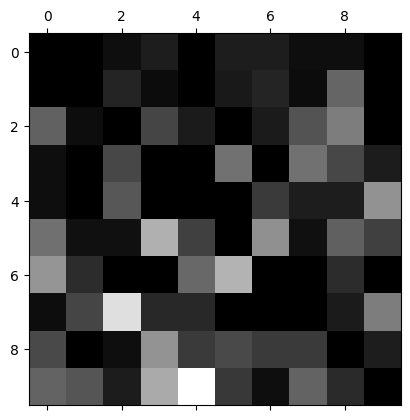

In [55]:
# obtiene las categorias de las muestras de validacion (lo contrario de one hot)
digitos_reales = np.argmax(y_valid_onehot, axis=1)
digitos_predichos = np.argmax(output_valid, axis=1)

# obtiene matriz de confusion
conf_mx = confusion_matrix(digitos_reales, digitos_predichos)

# normaliza las filas de la matriz de confusion
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

# coloca 0 en la diagonal para enfocarnos en los errores
np.fill_diagonal(norm_conf_mx, 0)

# plotea
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [56]:
conf_mx

array([[ 971,    0,    1,    2,    0,    2,    2,    1,    1,    0],
       [   0, 1117,    3,    1,    0,    2,    3,    1,    8,    0],
       [   7,    1, 1000,    5,    2,    0,    2,    6,    9,    0],
       [   1,    0,    5,  981,    0,    8,    0,    8,    5,    2],
       [   1,    0,    6,    0,  957,    0,    4,    2,    2,   10],
       [   7,    1,    1,   11,    4,  848,    9,    1,    6,    4],
       [  10,    3,    0,    0,    7,   12,  923,    0,    3,    0],
       [   1,    5,   16,    3,    3,    0,    0,  989,    2,    9],
       [   5,    0,    1,   10,    4,    5,    4,    4,  939,    2],
       [   7,    6,    2,   12,   18,    4,    1,    7,    3,  949]])

### Prueba el clasificador con una imagen de muestra

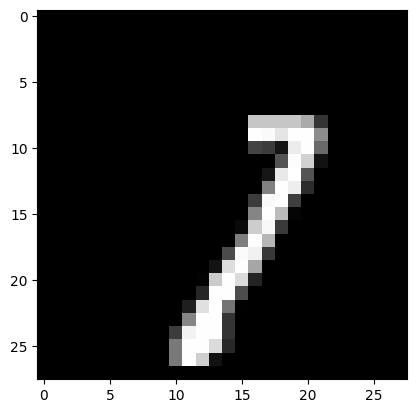

In [57]:
from keras.utils import load_img
from keras.utils import img_to_array


# carga  imagen  de archivo
img = load_img('imagen_muestra1.png', color_mode='grayscale', target_size=(28, 28))

# muestra imagen cargada
plt.imshow(img, cmap=plt.cm.gray)

# convierte a array
img = img_to_array(img)

# prepara la imagen como una simple muestra para hacer la prediccion
img = img.reshape(1, 28, 28)

# escala los pixels entre 0-1
img = img.astype('float32')
img = img / 255.0

In [58]:
# coloca la imagen en la red y obtiene la prediccion
output = modelo_finalMLP.predict(img)

print(output)
print('Digito predicho = {}'.format(np.argmax(output)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
[[7.2098072e-03 2.2198187e-04 1.3951002e-02 5.6607470e-02 1.8123378e-03
  1.0218999e-03 9.3848430e-06 8.8166696e-01 6.4869982e-04 3.6850389e-02]]
Digito predicho = 7
